# Assignment 3 (Note the table of content feature of Colab can be used for easy navigation)

##Part 1


Grid World Setup


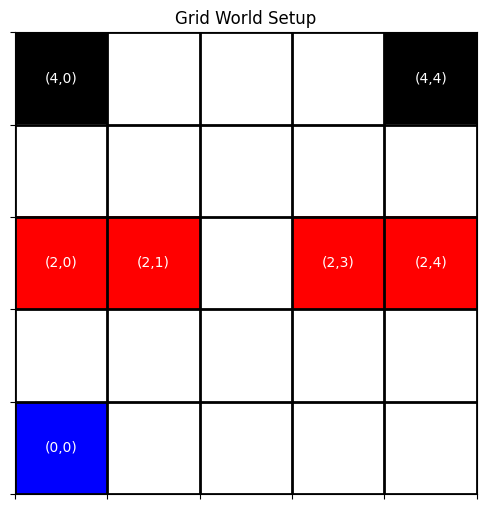


Grid World Setup (Text)
X - - - X 
- - - - - 
R R - R R 
- - - - - 
B - - - - 


Training Algorithms


Q-Learning Training: 100%|██████████| 10000000/10000000 [18:16<00:00, 9120.76it/s]



Sum of Rewards over Episodes


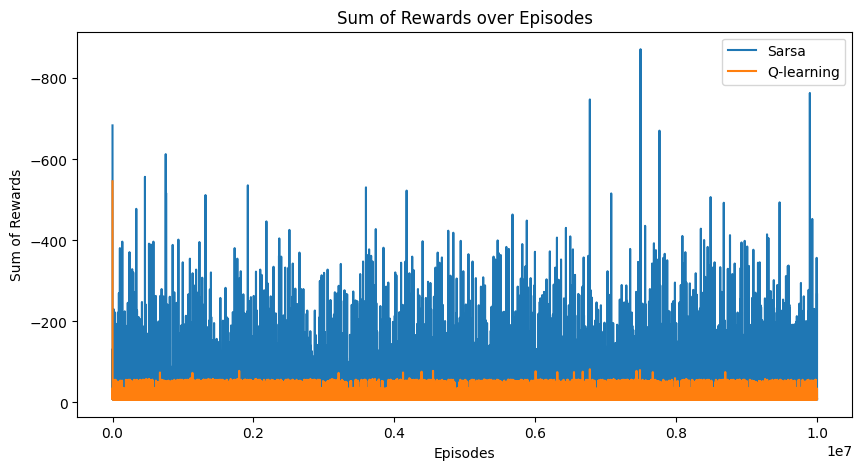


Trajectories

Sarsa Trajectory:


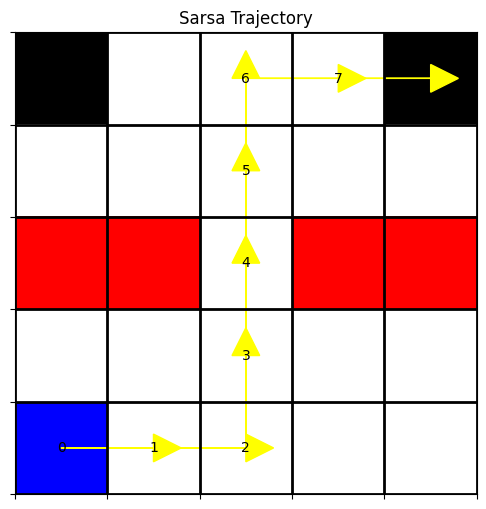


Q-learning Trajectory:


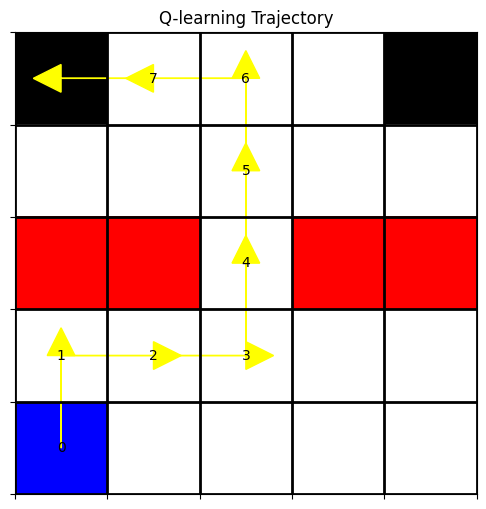


Trajectories (Text)

Sarsa Trajectory:
X . 6 7 X
. . 5 . .
R R 4 R R
. . 3 . .
0 1 2 . .

Q-learning Trajectory:
X 7 6 . X
. . 5 . .
R R 4 R R
1 2 3 . .
0 . . . .

Q-values


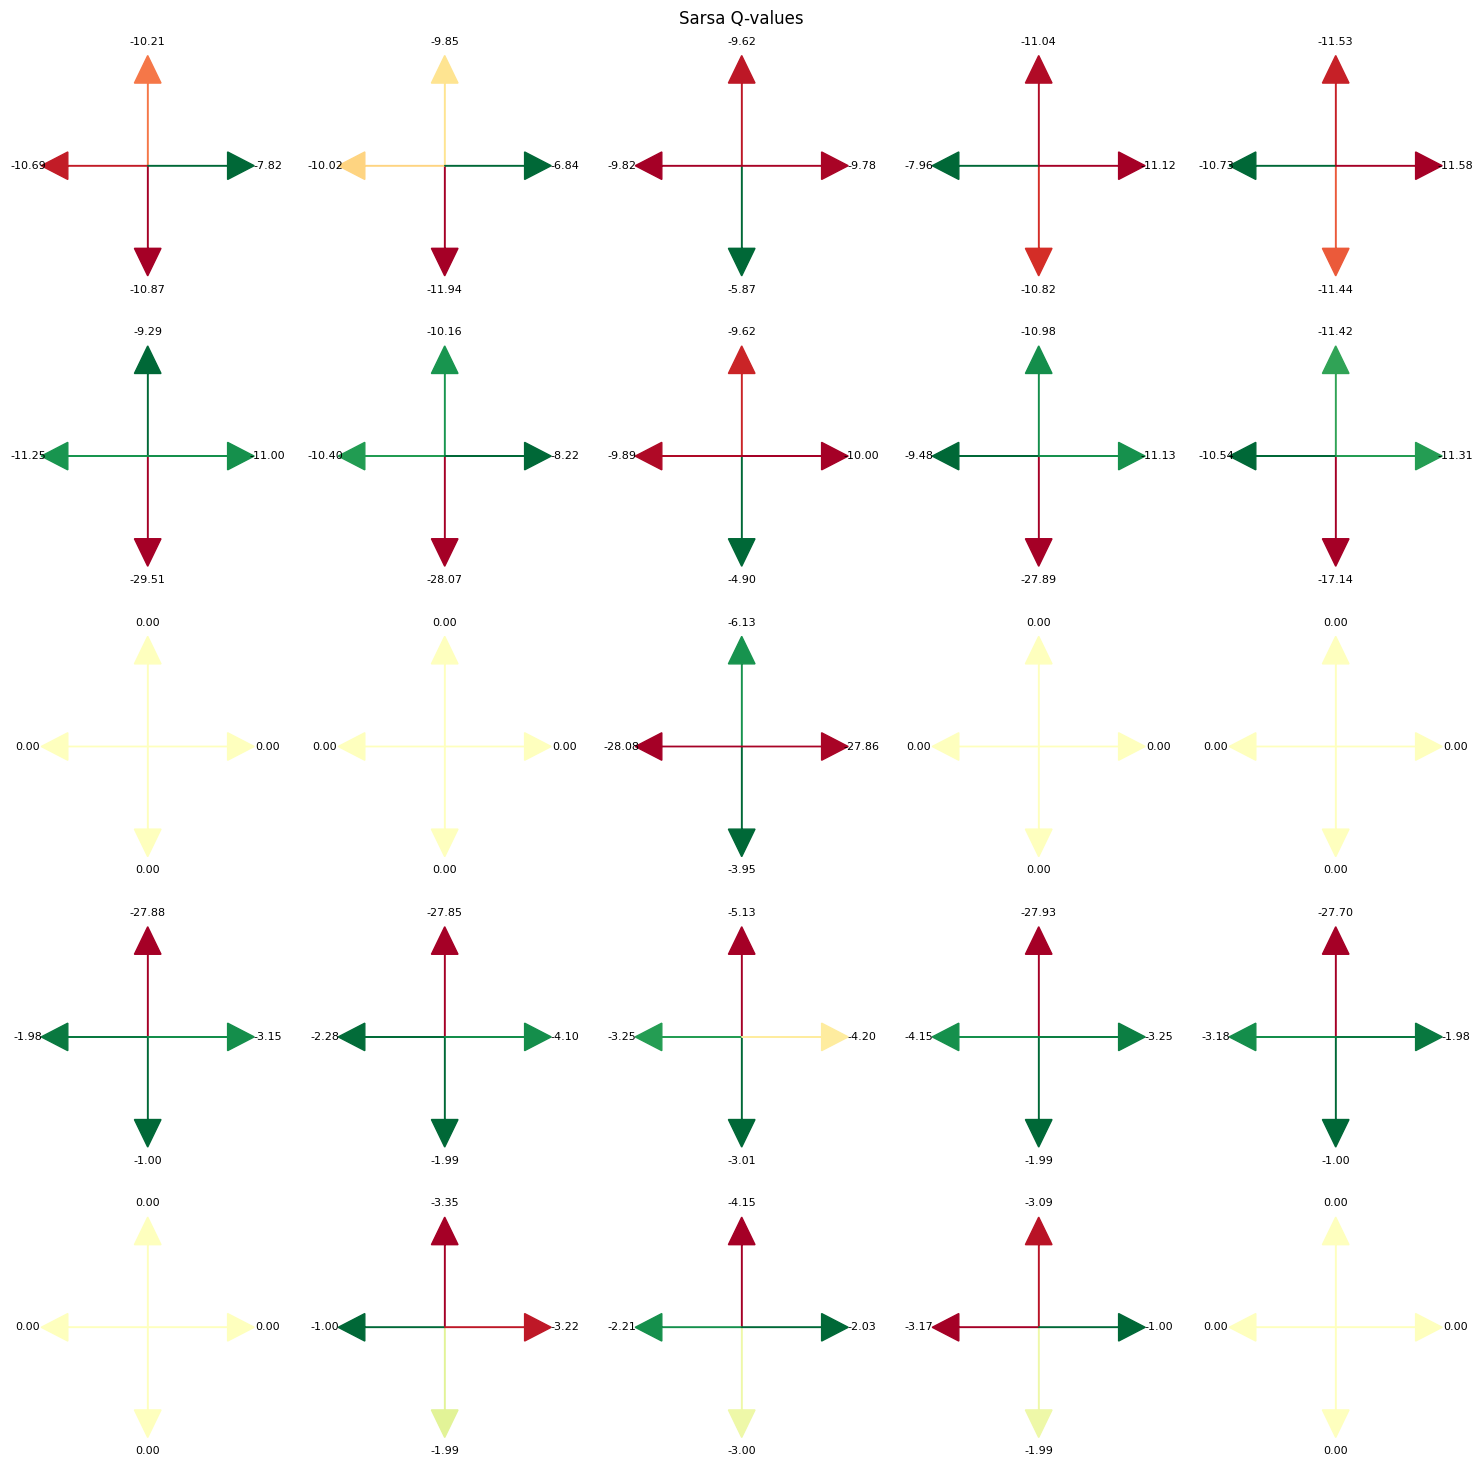

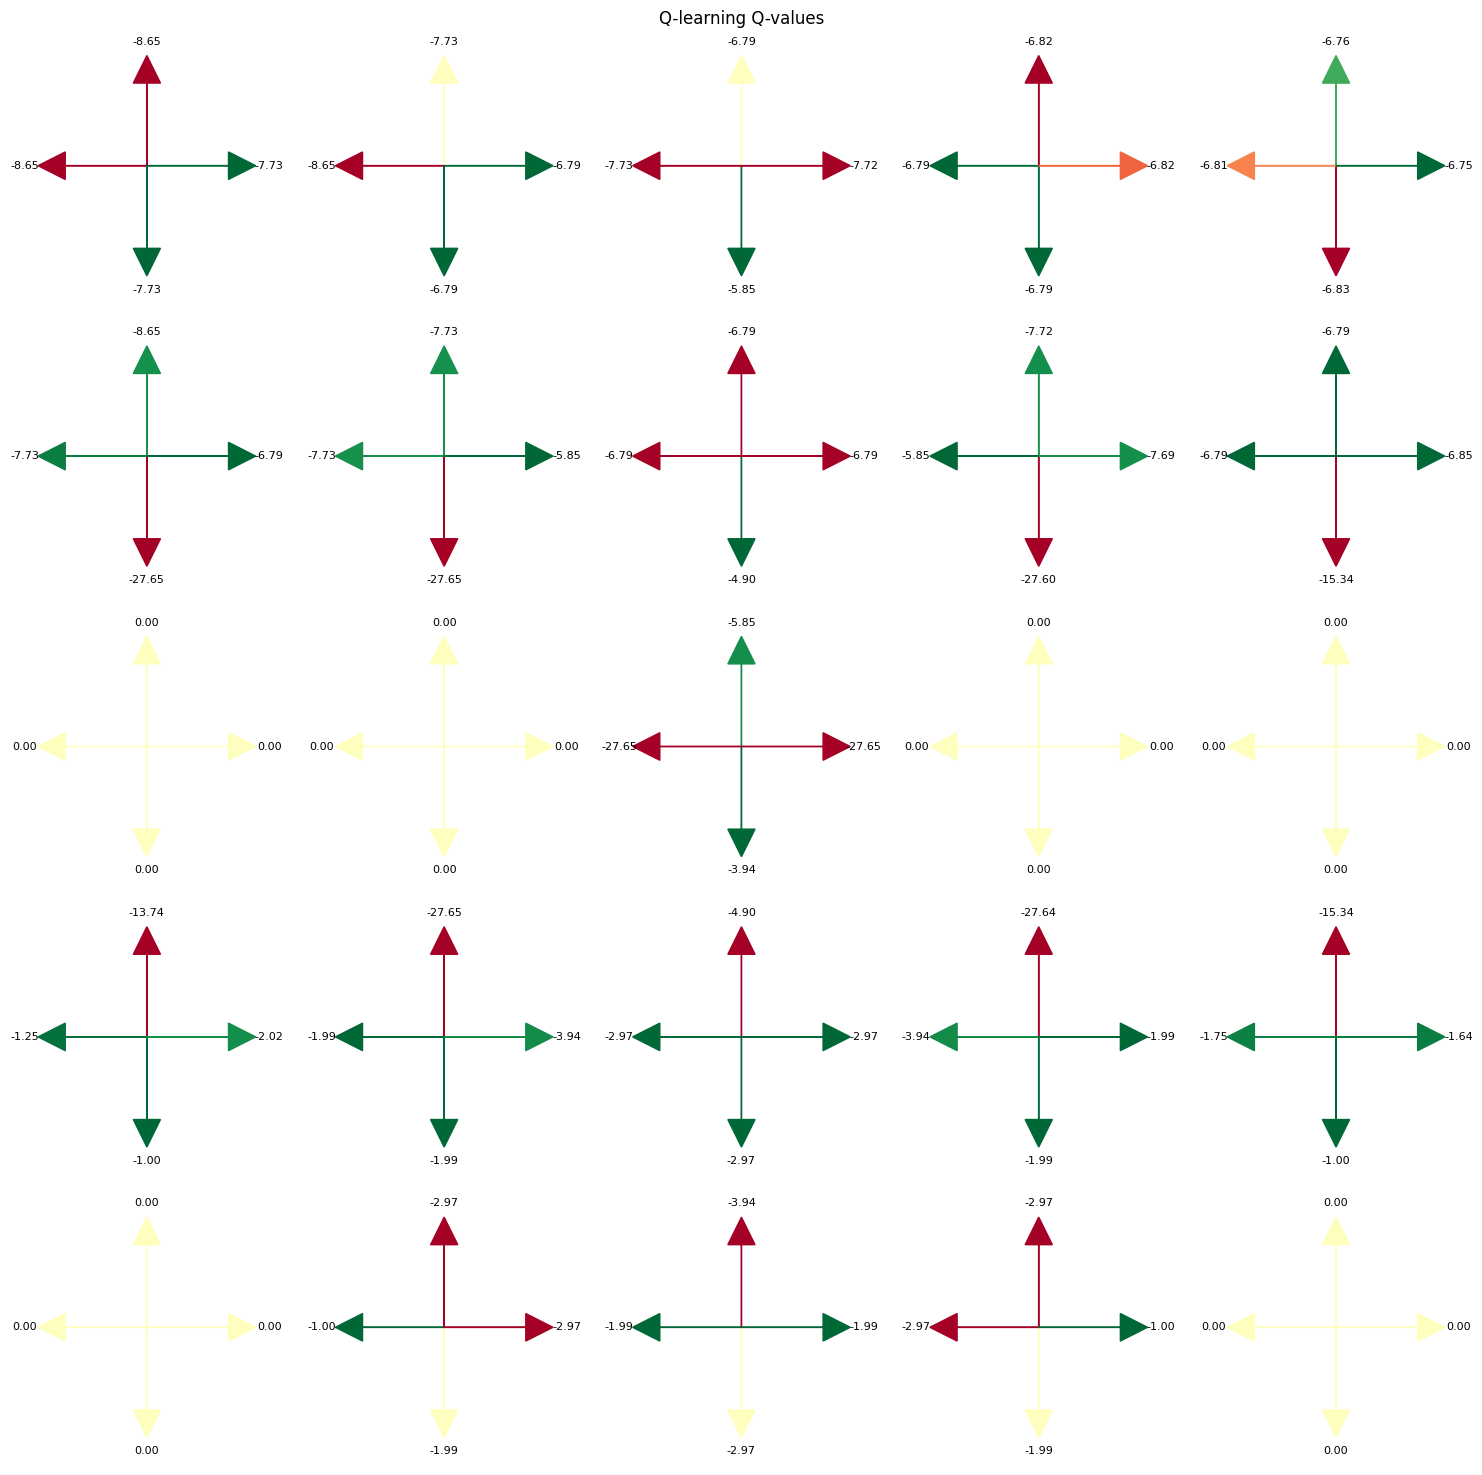


Q-values (Text)

Sarsa Q-values:
State (4, 0):
  Up: 0.00
  Down: 0.00
  Left: 0.00
  Right: 0.00

State (4, 1):
  Up: -3.35
  Down: -1.99
  Left: -1.00
  Right: -3.22

State (4, 2):
  Up: -4.15
  Down: -3.00
  Left: -2.21
  Right: -2.03

State (4, 3):
  Up: -3.09
  Down: -1.99
  Left: -3.17
  Right: -1.00

State (4, 4):
  Up: 0.00
  Down: 0.00
  Left: 0.00
  Right: 0.00

State (3, 0):
  Up: -27.88
  Down: -1.00
  Left: -1.98
  Right: -3.15

State (3, 1):
  Up: -27.85
  Down: -1.99
  Left: -2.28
  Right: -4.10

State (3, 2):
  Up: -5.13
  Down: -3.01
  Left: -3.25
  Right: -4.20

State (3, 3):
  Up: -27.93
  Down: -1.99
  Left: -4.15
  Right: -3.25

State (3, 4):
  Up: -27.70
  Down: -1.00
  Left: -3.18
  Right: -1.98

State (2, 0):
  Up: 0.00
  Down: 0.00
  Left: 0.00
  Right: 0.00

State (2, 1):
  Up: 0.00
  Down: 0.00
  Left: 0.00
  Right: 0.00

State (2, 2):
  Up: -6.13
  Down: -3.95
  Left: -28.08
  Right: -27.86

State (2, 3):
  Up: 0.00
  Down: 0.00
  Left: 0.00
  Right: 0.00



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define the GridWorld environment
class GridWorld:
    def __init__(self):
        self.grid_size = 5
        self.start = (0, 0)  # Blue start (bottom-left corner)
        self.black_boxes = [(4, 0), (4, 4)]  # Black boxes (top corners)
        self.red_boxes = [(2, 0), (2, 1), (2, 3), (2, 4)]  # Red boxes
        self.actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

    def step(self, state, action):
        next_state = (state[0] + action[0], state[1] + action[1])

        # Check if move is outside grid
        if not (0 <= next_state[0] < self.grid_size and 0 <= next_state[1] < self.grid_size):
            return state, -1, False

        # Check if move is to red box
        if next_state in self.red_boxes:
            return self.start, -20, False

        # Check if move is to black box (terminal state)
        if next_state in self.black_boxes:
            return next_state, -1, True

        # Regular move
        return next_state, -1, False

# Function to plot the grid world
def plot_grid(env):
    grid = np.ones((env.grid_size, env.grid_size, 3))  # White background

    grid[env.start] = [0, 0, 1]  # Blue
    for box in env.red_boxes:
        grid[box] = [1, 0, 0]  # Red
    for box in env.black_boxes:
        grid[box] = [0, 0, 0]  # Black

    plt.figure(figsize=(6, 6))
    plt.imshow(grid)
    plt.title('Grid World Setup')
    for i in range(env.grid_size):
        for j in range(env.grid_size):
            plt.text(j, i, f'({i},{j})', ha='center', va='center', color='w')

    # Add grid lines
    plt.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    plt.xticks(np.arange(-.5, 5, 1), [])
    plt.yticks(np.arange(-.5, 5, 1), [])

    plt.gca().invert_yaxis()  # Invert y-axis to match the coordinate system
    plt.show()

# Epsilon-greedy action selection
def epsilon_greedy(Q, state, epsilon):
    return np.random.randint(4) if np.random.random() < epsilon else np.argmax(Q[state])

# Epsilon decay function
def decay_epsilon(initial_epsilon, episode, decay_rate=0.9995):
    return max(initial_epsilon * (decay_rate ** episode), 0.01)

# SARSA algorithm
def sarsa(env, episodes, alpha=0.1, gamma=0.99, initial_epsilon=0.1):
    Q = np.zeros((env.grid_size, env.grid_size, 4))
    rewards_per_episode = []

    for episode in tqdm(range(episodes), desc="Sarsa Training"):
        epsilon = decay_epsilon(initial_epsilon, episode)
        state = env.start
        action = epsilon_greedy(Q, state, epsilon)
        total_reward = 0
        done = False

        while not done:
            next_state, reward, done = env.step(state, env.actions[action])
            next_action = epsilon_greedy(Q, next_state, epsilon)

            Q[state + (action,)] += alpha * (reward + gamma * Q[next_state + (next_action,)] - Q[state + (action,)])

            state = next_state
            action = next_action
            total_reward += reward

        rewards_per_episode.append(total_reward)

    return Q, rewards_per_episode

# Q-learning algorithm
def q_learning(env, episodes, alpha=0.1, gamma=0.99, initial_epsilon=0.1):
    Q = np.zeros((env.grid_size, env.grid_size, 4))
    rewards_per_episode = []

    for episode in tqdm(range(episodes), desc="Q-Learning Training"):
        epsilon = decay_epsilon(initial_epsilon, episode)
        state = env.start
        total_reward = 0
        done = False

        while not done:
            action = epsilon_greedy(Q, state, epsilon)
            next_state, reward, done = env.step(state, env.actions[action])

            Q[state + (action,)] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state + (action,)])

            state = next_state
            total_reward += reward

        rewards_per_episode.append(total_reward)

    return Q, rewards_per_episode

# Function to plot trajectory
def plot_trajectory(env, Q, title):
    state = env.start
    trajectory = [state]
    done = False

    while not done:
        action = np.argmax(Q[state])
        next_state, _, done = env.step(state, env.actions[action])
        trajectory.append(next_state)
        state = next_state

    grid = np.ones((env.grid_size, env.grid_size, 3))
    grid[env.start] = [0, 0, 1]  # Blue
    for box in env.red_boxes:
        grid[box] = [1, 0, 0]  # Red
    for box in env.black_boxes:
        grid[box] = [0, 0, 0]  # Black

    plt.figure(figsize=(6, 6))
    plt.imshow(grid)
    trajectory = np.array(trajectory)
    for i in range(len(trajectory) - 1):
        plt.arrow(trajectory[i][1], trajectory[i][0],
                  trajectory[i+1][1] - trajectory[i][1],
                  trajectory[i+1][0] - trajectory[i][0],
                  color='yellow', head_width=0.3, head_length=0.3)
        plt.text(trajectory[i][1], trajectory[i][0], str(i), color='black', ha='center', va='center')
    plt.title(f'{title} Trajectory')
    plt.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    plt.xticks(np.arange(-.5, 5, 1), [])
    plt.yticks(np.arange(-.5, 5, 1), [])
    plt.gca().invert_yaxis()
    plt.show()

# Function to plot Q-values
def plot_q_values(Q, title):
    fig, axs = plt.subplots(5, 5, figsize=(15, 15))
    for i in range(5):
        for j in range(5):
            q_values = Q[i, j]
            max_q = np.max(q_values)
            min_q = np.min(q_values)
            for k, (dx, dy) in enumerate([(0, 0.3), (0, -0.3), (-0.3, 0), (0.3, 0)]):
                color = plt.cm.RdYlGn((q_values[k] - min_q) / (max_q - min_q) if max_q != min_q else 0.5)
                axs[i, j].arrow(0.5, 0.5, dx, dy, head_width=0.1, head_length=0.1, fc=color, ec=color)
                axs[i, j].text(0.5+dx*1.5, 0.5+dy*1.5, f'{q_values[k]:.2f}', ha='center', va='center', fontsize=8)
            axs[i, j].set_xlim(0, 1)
            axs[i, j].set_ylim(0, 1)
            axs[i, j].axis('off')
    plt.suptitle(f'{title} Q-values')
    plt.tight_layout()
    plt.show()

# Function to convert grid to text representation
def grid_to_text(env):
    grid_text = ""
    for i in range(env.grid_size-1, -1, -1):  # Reverse order to match image
        for j in range(env.grid_size):
            if (i, j) == env.start:
                grid_text += "B "  # Blue start
            elif (i, j) in env.black_boxes:
                grid_text += "X "  # Black boxes
            elif (i, j) in env.red_boxes:
                grid_text += "R "  # Red boxes
            else:
                grid_text += "- "  # Empty space
        grid_text += "\n"
    return grid_text

# Function to get trajectory
def get_trajectory(env, Q):
    state = env.start
    trajectory = [state]
    done = False

    while not done:
        action = np.argmax(Q[state])
        next_state, _, done = env.step(state, env.actions[action])
        trajectory.append(next_state)
        state = next_state

    return trajectory

# Function to convert trajectory to text representation
def trajectory_to_text(env, trajectory):
    grid = [['.' for _ in range(env.grid_size)] for _ in range(env.grid_size)]
    for i, (x, y) in enumerate(trajectory):
        grid[env.grid_size - 1 - x][y] = str(i)  # Reverse x to match image

    for box in env.red_boxes:
        grid[env.grid_size - 1 - box[0]][box[1]] = 'R'
    for box in env.black_boxes:
        grid[env.grid_size - 1 - box[0]][box[1]] = 'X'

    return '\n'.join(' '.join(row) for row in grid)

# Function to convert Q-values to text representation
def q_values_to_text(Q):
    text = ""
    for i in range(Q.shape[0]-1, -1, -1):  # Reverse order to match image
        for j in range(Q.shape[1]):
            text += f"State ({i}, {j}):\n"
            for k, action in enumerate(["Up", "Down", "Left", "Right"]):
                text += f"  {action}: {Q[i, j, k]:.2f}\n"
            text += "\n"
    return text

# Main execution
env = GridWorld()
episodes = 10000000

print("\n" + "="*50 + "\nGrid World Setup\n" + "="*50)
plot_grid(env)

print("\n" + "="*50 + "\nGrid World Setup (Text)\n" + "="*50)
print(grid_to_text(env))

print("\n" + "="*50 + "\nTraining Algorithms\n" + "="*50)
sarsa_Q, sarsa_rewards = sarsa(env, episodes)
q_learning_Q, q_learning_rewards = q_learning(env, episodes)

print("\n" + "="*50 + "\nSum of Rewards over Episodes\n" + "="*50)
plt.figure(figsize=(10, 5))
plt.plot(sarsa_rewards, label='Sarsa')
plt.plot(q_learning_rewards, label='Q-learning')
plt.xlabel('Episodes')
plt.ylabel('Sum of Rewards')
plt.title('Sum of Rewards over Episodes')
plt.legend()
plt.gca().invert_yaxis()  # Flip the y-axis
plt.show()

print("\n" + "="*50 + "\nTrajectories\n" + "="*50)
print("\nSarsa Trajectory:")
plot_trajectory(env, sarsa_Q, "Sarsa")
print("\nQ-learning Trajectory:")
plot_trajectory(env, q_learning_Q, "Q-learning")

print("\n" + "="*50 + "\nTrajectories (Text)\n" + "="*50)
print("\nSarsa Trajectory:")
sarsa_trajectory = get_trajectory(env, sarsa_Q)
print(trajectory_to_text(env, sarsa_trajectory))

print("\nQ-learning Trajectory:")
q_learning_trajectory = get_trajectory(env, q_learning_Q)
print(trajectory_to_text(env, q_learning_trajectory))

print("\n" + "="*50 + "\nQ-values\n" + "="*50)
plot_q_values(sarsa_Q, "Sarsa")
plot_q_values(q_learning_Q, "Q-learning")

print("\n" + "="*50 + "\nQ-values (Text)\n" + "="*50)
print("\nSarsa Q-values:")
print(q_values_to_text(sarsa_Q))
print("\nQ-learning Q-values:")
print(q_values_to_text(q_learning_Q))

##Part 2


Training Algorithms


TD(0): 100%|██████████| 10000/10000 [00:14<00:00, 703.65it/s]



Value Functions

Gradient Monte Carlo Value Function:


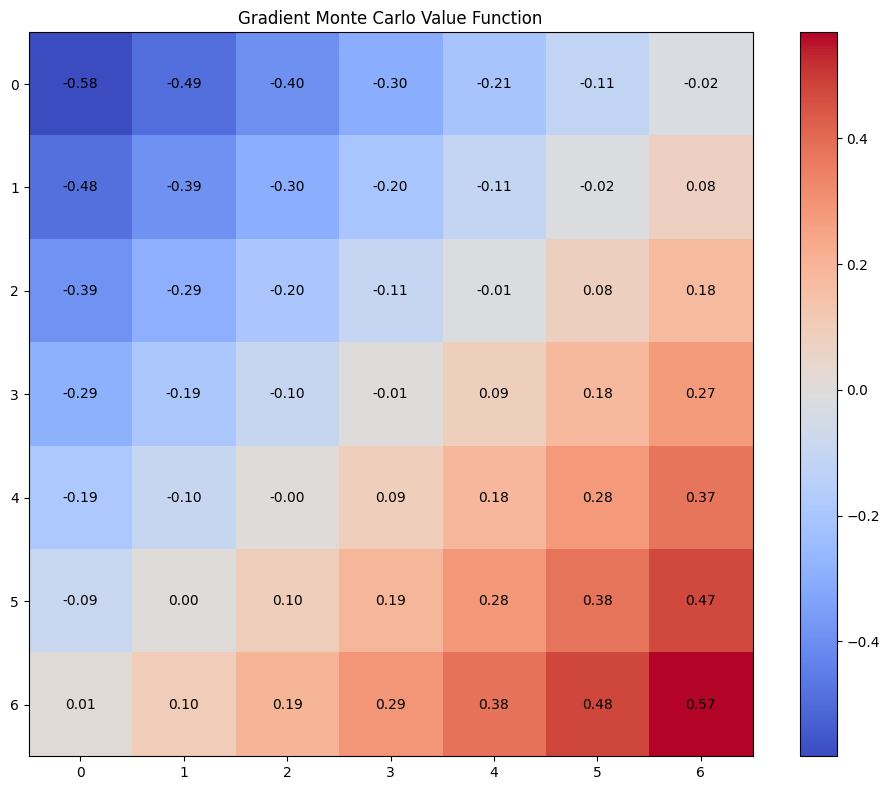

  -0.58   -0.49   -0.40   -0.30   -0.21   -0.11   -0.02
  -0.48   -0.39   -0.30   -0.20   -0.11   -0.02    0.08
  -0.39   -0.29   -0.20   -0.11   -0.01    0.08    0.18
  -0.29   -0.19   -0.10   -0.01    0.09    0.18    0.27
  -0.19   -0.10   -0.00    0.09    0.18    0.28    0.37
  -0.09    0.00    0.10    0.19    0.28    0.38    0.47
   0.01    0.10    0.19    0.29    0.38    0.48    0.57

Semi-gradient TD(0) Value Function:


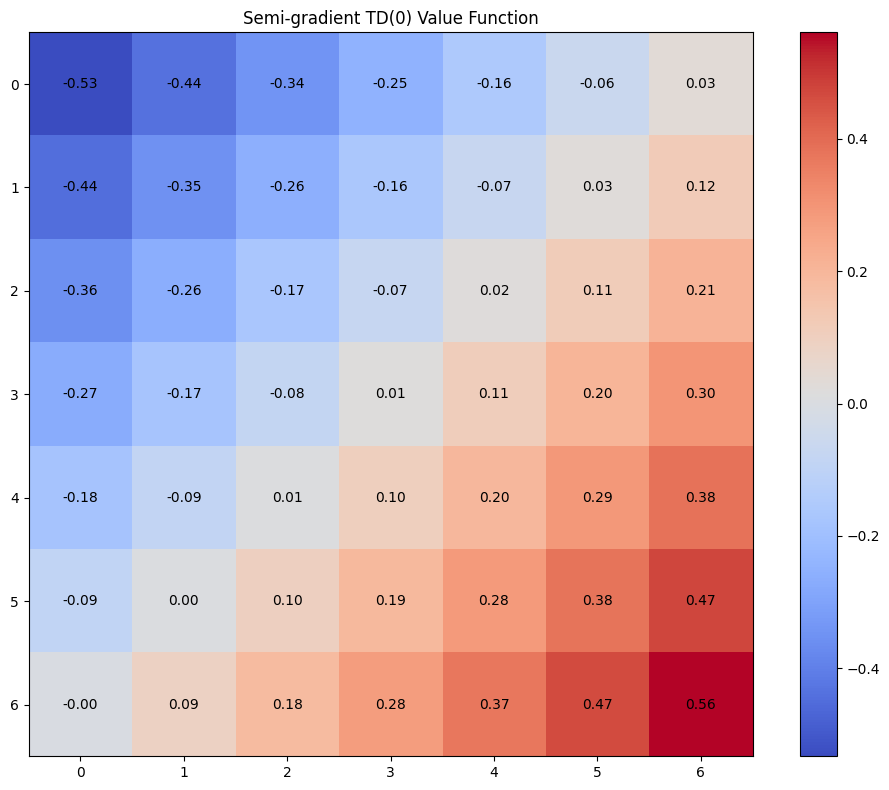

  -0.53   -0.44   -0.34   -0.25   -0.16   -0.06    0.03
  -0.44   -0.35   -0.26   -0.16   -0.07    0.03    0.12
  -0.36   -0.26   -0.17   -0.07    0.02    0.11    0.21
  -0.27   -0.17   -0.08    0.01    0.11    0.20    0.30
  -0.18   -0.09    0.01    0.10    0.20    0.29    0.38
  -0.09    0.00    0.10    0.19    0.28    0.38    0.47
  -0.00    0.09    0.18    0.28    0.37    0.47    0.56

Exact Value Function:


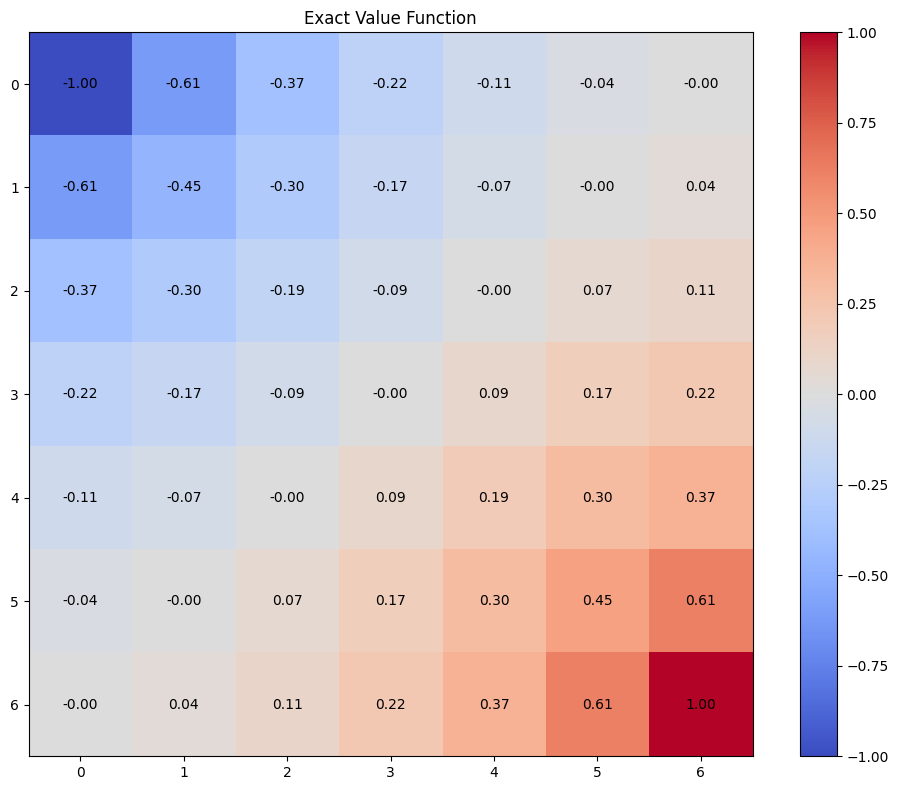

  -1.00   -0.61   -0.37   -0.22   -0.11   -0.04   -0.00
  -0.61   -0.45   -0.30   -0.17   -0.07   -0.00    0.04
  -0.37   -0.30   -0.19   -0.09   -0.00    0.07    0.11
  -0.22   -0.17   -0.09   -0.00    0.09    0.17    0.22
  -0.11   -0.07   -0.00    0.09    0.19    0.30    0.37
  -0.04   -0.00    0.07    0.17    0.30    0.45    0.61
  -0.00    0.04    0.11    0.22    0.37    0.61    1.00

Comparison
Mean Squared Error (Monte Carlo): 0.010418
Mean Squared Error (TD(0)): 0.011983

Value Function Comparison


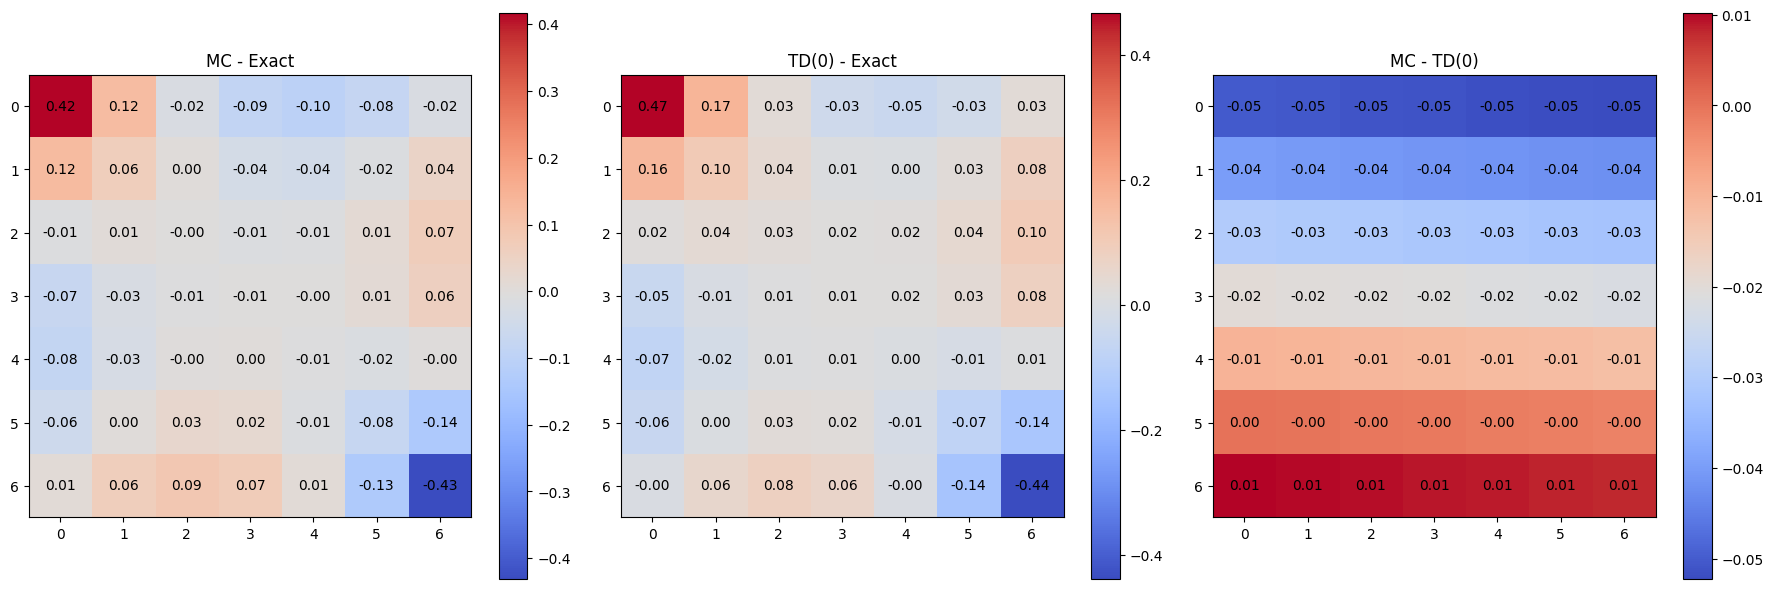


Quick Preliminary Analysis:
Maximum absolute error (Monte Carlo): 0.4311
Maximum absolute error (TD(0)): 0.4670
States with highest error (Monte Carlo): (6, 6)
States with highest error (TD(0)): (0, 0)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define the Random Walk Grid environment
class RandomWalkGrid:
    def __init__(self):
        self.grid_size = 7
        self.start = (3, 3)  # Center of the grid
        self.terminal_states = [(0, 0), (6, 6)]  # Bottom-left and top-right corners
        self.actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

    def step(self, state):
        action = self.actions[np.random.randint(4)]
        next_state = (max(0, min(6, state[0] + action[0])),
                      max(0, min(6, state[1] + action[1])))

        if next_state == self.terminal_states[0]:
            return next_state, -1, True
        elif next_state == self.terminal_states[1]:
            return next_state, 1, True
        elif next_state == state:  # Attempted to move outside
            return state, 0, False
        else:
            return next_state, 0, False

# Convert state to feature vector for function approximation
def state_to_features(state):
    return np.array([1, state[0], state[1]])  # Affine: [1, x, y]

# Decay learning rate over time
def decay_alpha(alpha0, episode, decay_rate=0.9999):
    return max(alpha0 * (decay_rate ** episode), 1e-4)

# Gradient Monte Carlo algorithm
def gradient_monte_carlo(env, num_episodes, alpha0, decay_alpha):
    w = np.zeros(3)
    returns = {(i, j): [] for i in range(7) for j in range(7)}

    for episode in tqdm(range(num_episodes), desc="Monte Carlo"):
        alpha = decay_alpha(alpha0, episode)
        state = env.start
        episode_states = []

        while True:
            next_state, reward, done = env.step(state)
            episode_states.append((state, reward))
            if done:
                break
            state = next_state

        G = 0
        for state, reward in reversed(episode_states):
            G = G + reward
            if state not in env.terminal_states:
                returns[state].append(G)
                mean_return = np.mean(returns[state])
                x = state_to_features(state)
                w += alpha * (mean_return - np.dot(w, x)) * x

    return w

# Semi-gradient TD(0) algorithm
def semi_gradient_td0(env, num_episodes, alpha0, decay_alpha):
    w = np.zeros(3)

    for episode in tqdm(range(num_episodes), desc="TD(0)"):
        alpha = decay_alpha(alpha0, episode)
        state = env.start
        done = False

        while not done:
            next_state, reward, done = env.step(state)
            x = state_to_features(state)
            if done:
                target = reward
            else:
                target = reward + np.dot(w, state_to_features(next_state))
            w += alpha * (target - np.dot(w, x)) * x
            state = next_state

    return w

# Compute exact value function using iterative method
def compute_exact_value_function():
    V = np.zeros((7, 7))
    V[0, 0] = -1
    V[6, 6] = 1
    delta = 1

    while delta > 1e-6:
        delta = 0
        for i in range(7):
            for j in range(7):
                if (i, j) in [(0, 0), (6, 6)]:
                    continue
                v = V[i, j]
                V[i, j] = 0.25 * (V[max(0, i-1), j] + V[min(6, i+1), j] +
                                  V[i, max(0, j-1)] + V[i, min(6, j+1)])
                delta = max(delta, abs(v - V[i, j]))

    return V

# Plot value function
def plot_value_function(V, title):
    plt.figure(figsize=(10, 8))
    plt.imshow(V, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    for i in range(7):
        for j in range(7):
            plt.text(j, i, f'{V[i, j]:.2f}', ha='center', va='center')
    plt.tight_layout()
    plt.show()

# Convert value function to text representation
def value_function_to_text(V):
    return '\n'.join(' '.join(f'{V[i, j]:7.2f}' for j in range(7)) for i in range(7))

# Plot comparison of value functions
def plot_value_function_comparison(V_mc, V_td, V_exact):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    titles = ['MC - Exact', 'TD(0) - Exact', 'MC - TD(0)']
    differences = [V_mc - V_exact, V_td - V_exact, V_mc - V_td]

    for ax, diff, title in zip(axes, differences, titles):
        im = ax.imshow(diff, cmap='coolwarm', interpolation='nearest')
        ax.set_title(title)
        fig.colorbar(im, ax=ax)

        for i in range(7):
            for j in range(7):
                ax.text(j, i, f'{diff[i, j]:.2f}', ha='center', va='center')

    plt.tight_layout()
    plt.show()

# Main execution
env = RandomWalkGrid()
num_episodes = 10000
alpha_mc = 0.001
alpha_td = 0.001

print("\n" + "="*50 + "\nTraining Algorithms\n" + "="*50)
# Gradient Monte Carlo
w_mc = gradient_monte_carlo(env, num_episodes, alpha_mc, decay_alpha)
V_mc = np.array([[np.dot(w_mc, state_to_features((i, j))) for j in range(7)] for i in range(7)])

# Semi-gradient TD(0)
w_td = semi_gradient_td0(env, num_episodes, alpha_td, decay_alpha)
V_td = np.array([[np.dot(w_td, state_to_features((i, j))) for j in range(7)] for i in range(7)])

# Exact value function
V_exact = compute_exact_value_function()

print("\n" + "="*50 + "\nValue Functions\n" + "="*50)
print("\nGradient Monte Carlo Value Function:")
plot_value_function(V_mc, "Gradient Monte Carlo Value Function")
print(value_function_to_text(V_mc))

print("\nSemi-gradient TD(0) Value Function:")
plot_value_function(V_td, "Semi-gradient TD(0) Value Function")
print(value_function_to_text(V_td))

print("\nExact Value Function:")
plot_value_function(V_exact, "Exact Value Function")
print(value_function_to_text(V_exact))

# Compare methods
mse_mc = np.mean((V_mc - V_exact)**2)
mse_td = np.mean((V_td - V_exact)**2)

print("\n" + "="*50 + "\nComparison\n" + "="*50)
print(f"Mean Squared Error (Monte Carlo): {mse_mc:.6f}")
print(f"Mean Squared Error (TD(0)): {mse_td:.6f}")

print("\n" + "="*50 + "\nValue Function Comparison\n" + "="*50)
plot_value_function_comparison(V_mc, V_td, V_exact)

print("\nQuick Preliminary Analysis:")
print(f"Maximum absolute error (Monte Carlo): {np.max(np.abs(V_mc - V_exact)):.4f}")
print(f"Maximum absolute error (TD(0)): {np.max(np.abs(V_td - V_exact)):.4f}")
print(f"States with highest error (Monte Carlo): {np.unravel_index(np.argmax(np.abs(V_mc - V_exact)), V_mc.shape)}")
print(f"States with highest error (TD(0)): {np.unravel_index(np.argmax(np.abs(V_td - V_exact)), V_td.shape)}")
